<a href="https://colab.research.google.com/github/Tiwari-Ankush/image-classifier/blob/main/SL_Image_Classification_using_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Create directory **Classification_Images** and download 30 images of each category using bing image downloader.

In [12]:
%mkdir Classification_Images

In [13]:
# Create the Classification_Images folder and subdirectories
!mkdir -p Classification_Images/cute\ puppy Classification_Images/icecream\ cone Classification_Images/red\ rose


In [2]:
!pip install bing_image_downloader

In [3]:
# Import icecream cone images using bing downloader
from bing_image_downloader import downloader
downloader.download("icecream cone",limit=30, output_dir="Classification_Images",adult_filter_off=True)

[%] Downloading Images to /content/Classification_Images/icecream cone


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://upload.wikimedia.org/wikipedia/commons/8/86/Ice_cream_cone.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.foodrepublic.com/wp-content/uploads/2016/08/cones_mainimage.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://shewearsmanyhats.com/wp-content/uploads/2013/07/dipped-ice-cream-cones-7.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://upload.wikimedia.org/wikipedia/commons/d/da/Strawberry_ice_cream_cone_(5076899310).jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://wallpaperaccess.com/full/1643139.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://blackfamilyfun.com/wp-content/uploads/2015/04/94482017-e1430401846608.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://veryvera.wierstewarthosting.com/wp-content/uploads/2021/01/22

In [4]:
# Import puppy images using bing downloader
from bing_image_downloader import downloader
downloader.download("cute puppy",limit=30, output_dir="Classification_Images",adult_filter_off=True)

[%] Downloading Images to /content/Classification_Images/cute puppy


[!!]Indexing page: 1

[%] Indexed 90 Images on Page 1.


[%] Downloading Image #1 from http://www.pixelstalk.net/wp-content/uploads/2016/08/Cute-Puppies-Dog-Wallpaper.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://www.cutenessoverflow.com/wp-content/uploads/2014/02/Little-Cute-Puppy-1600x1200.jpg
[!] Issue getting: http://www.cutenessoverflow.com/wp-content/uploads/2014/02/Little-Cute-Puppy-1600x1200.jpg
[!] Error:: Remote end closed connection without response
[%] Downloading Image #2 from http://data.1freewallpapers.com/download/cute-labrador-puppy.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://1.bp.blogspot.com/-sNMzt5B_434/UqRMeJqTFXI/AAAAAAAAWy8/S1HlRlOLQ2w/s1600/cute-puppy-298302.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://wallpapercave.com/wp/FrYP8MW.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://www.rd.com/wp-content/uploads/2018/02/09_A

In [5]:
# Import red rose images using bing downloader
from bing_image_downloader import downloader
downloader.download("red rose",limit=30, output_dir="Classification_Images",adult_filter_off=True)

[%] Downloading Images to /content/Classification_Images/red rose


[!!]Indexing page: 1

[%] Indexed 90 Images on Page 1.


[%] Downloading Image #1 from http://upload.wikimedia.org/wikipedia/commons/9/9f/Beautiful_Red_Rose.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://www.photos-public-domain.com/wp-content/uploads/2011/03/red-roses.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://upload.wikimedia.org/wikipedia/commons/5/51/Small_Red_Rose.JPG
[%] File Downloaded !

[%] Downloading Image #4 from https://images.pexels.com/photos/655217/pexels-photo-655217.jpeg?cs=srgb&amp;dl=pexels-parag-deshmukh-655217.jpg&amp;fm=jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://entertainmentmesh.com/wp-content/uploads/2016/01/deep-red-rose.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://2.bp.blogspot.com/-ngmjXmcrD2k/Uj6AbaKlcOI/AAAAAAAAAaA/fnlfDYl1pQ4/s1600/Image+of+flowers-Red-Abstract-Rose-Hd-Wallpaper-picture-of-flowers.jpg
[%] File

Download **Classification_Images** folder locally

In [6]:
import shutil
shutil.make_archive('Classification_Images', 'zip', 'Classification_Images')

'/content/Classification_Images.zip'

Generate **requirements.txt**

In [7]:
# Find all files needed to run this code
!pip freeze > requirements.txt

**Preprocessing of data** using os module

In [14]:
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize

# Initialize lists for storing data
target = []
flat_data = []
images = []
DataDirectory = '/content/Classification_Images'

# Categories of images
Categories = ["cute puppy", "icecream cone", "red rose"]

for i in Categories:
    print("Category is:", i, "\tLabel encoded as:", Categories.index(i))
    # Encode categories cute puppy as 0, icecream cone as 1 and red rose as 2
    target_class = Categories.index(i)

    # Create data path for all folders under MinorProject
    path = os.path.join(DataDirectory, i)

    for img in os.listdir(path):
        img_path = os.path.join(path, img)

        try:
            # Read image and check dimensions
            img_array = imread(img_path)
            if len(img_array.shape) != 3 or img_array.shape[2] != 3:
                print(f"Skipping {img}: Expected 3 channels, but got {img_array.shape}")
                continue

            # Resize the image to a consistent size
            img_resized = resize(img_array, (150, 150, 3))

            # Flatten the resized image and ensure correct shape
            flat_img = img_resized.flatten()

            # Verify that all flattened images have the same size (150x150x3 = 67500 elements)
            if flat_img.shape[0] != 150 * 150 * 3:
                print(f"Skipping {img}: Unexpected flattened image shape {flat_img.shape}")
                continue

            # Append flattened image and label to the lists
            flat_data.append(flat_img)
            images.append(img_resized)
            target.append(target_class)

        except Exception as e:
            print(f"Error processing {img_path}: {e}")
            continue

# Convert lists to numpy arrays (after ensuring all are of the same shape)
flat_data = np.array(flat_data)
images = np.array(images)
target = np.array(target)

print(f"Data processing complete. Processed {len(flat_data)} images.")


Category is: cute puppy 	Label encoded as: 0
Category is: icecream cone 	Label encoded as: 1
Skipping Image_22.png: Expected 3 channels, but got (2096, 1185, 4)


/usr/local/lib/python3.10/dist-packages/imageio/plugins/spe.py:507: UserWarning: The file header of /content/Classification_Images/icecream cone/Classification_Images.zip claims there are -2001661584 frames, but there are actually 1 frames.
  warnings.warn(


Error processing /content/Classification_Images/icecream cone/Classification_Images.zip: cannot reshape array of size 13705239 into shape (10333,843)
Skipping Image_11.png: Expected 3 channels, but got (2096, 1185, 4)
Skipping Image_20.gif: Expected 3 channels, but got (1, 800, 533, 3)
Skipping Image_9.gif: Expected 3 channels, but got (1, 800, 533, 3)
Skipping Image_28.png: Expected 3 channels, but got (2096, 1185, 4)
Category is: red rose 	Label encoded as: 2
Skipping Image_30.png: Expected 3 channels, but got (489, 500, 4)
Skipping Image_9.png: Expected 3 channels, but got (600, 378, 4)
Skipping Image_20.png: Expected 3 channels, but got (600, 378, 4)
Data processing complete. Processed 85 images.


**Dataframe creation** using pandas library

In [15]:
df = pd.DataFrame(flat_data)
# Create a column for output data called Target
df['Target'] = target
# Rows are all the input images (90 images, 30 of each category)
df

,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.462389,0.318032,0.181440,0.468029,0.317700,0.170888,0.466332,0.316896,0.169035,0.463779,...,0.319566,0.198820,0.142023,0.312963,0.189194,0.139495,0.297903,0.177528,0.109534,0
1,0.538398,0.608987,0.758006,0.535482,0.606070,0.755090,0.533574,0.604162,0.753182,0.531331,...,0.672779,0.691596,0.715593,0.701448,0.717390,0.754330,0.716830,0.735300,0.761944,0
2,0.027452,0.023525,0.015693,0.026673,0.022747,0.013404,0.023844,0.019922,0.005082,0.023532,...,0.423637,0.036699,0.050744,0.426997,0.042796,0.047830,0.380492,0.021587,0.028942,0
3,0.181204,0.116001,0.085360,0.181960,0.116757,0.086116,0.186762,0.121558,0.090917,0.192378,...,0.645810,0.536625,0.378781,0.667695,0.557958,0.399457,0.662325,0.547713,0.385411,0
4,0.553559,0.539892,0.522163,0.532916,0.518972,0.503674,0.566849,0.551629,0.538948,0.604628,...,0.106938,0.443295,0.027579,0.102400,0.439085,0.027842,0.245517,0.516693,0.112961,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,0.819369,0.858584,0.866428,0.818539,0.857754,0.865597,0.808459,0.847674,0.855518,0.796353,...,0.791432,0.791432,0.791432,0.778592,0.778592,0.778592,0.774011,0.774011,0.774011,2
81,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2
82,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2
83,0.976307,0.951364,0.902342,0.933842,0.886995,0.799184,0.898291,0.849210,0.756650,0.883923,...,0.976435,0.948420,0.898613,0.975577,0.947267,0.900478,0.987629,0.978450,0.961117,2


AxesImage(size=(150, 150))


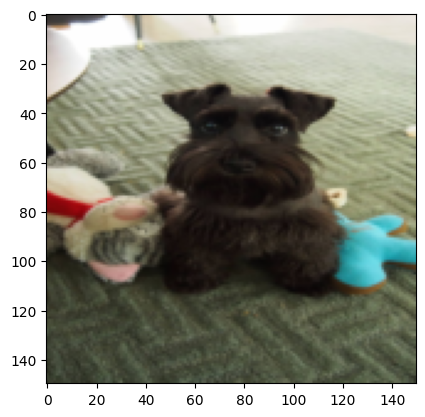

In [17]:
# Display 1 resized image
print(plt.imshow(images[20]))

**Test and train dataset** creation using sklearn library functions
1.   Data is first split into input and output
2.   Input and Output are further split into testing and training data, individually



In [18]:
# Split data into input and output sets
from sklearn.model_selection import train_test_split

# x is all input values of images and their pixel values (90 images * 67500)
# y is output values or correct label of image (90 images * 1 column of labels)

x = df.iloc[:,:-1].values
y = target
print("Input data dimensions:",x.shape)
print("Output data dimensions:",y.shape)

# Stratify ensures every image is divided in equal proportions (no bias)
x_train,x_test,y_train,y_test = train_test_split(x,y,shuffle=True,test_size = 0.3,random_state=109,stratify=y)
print("Dimensions of input training data:",x_train.shape)
print("Dimensions of input testing data:",x_test.shape)
print("Dimensions of output training data:",y_train.shape)
print("Dimensions of output testing data:",y_test.shape)

Input data dimensions: (85, 67500)
Output data dimensions: (85,)
Dimensions of input training data: (59, 67500)
Dimensions of input testing data: (26, 67500)
Dimensions of output training data: (59,)
Dimensions of output testing data: (26,)


In [19]:
# Check if testing and training data are divided in equal proportions
print("Labels\t\t   Image index considered")
print(np.unique(y_train,return_counts=True))
print(np.unique(y_test,return_counts=True))

Labels		   Image index considered
(array([0, 1, 2]), array([21, 19, 19]))
(array([0, 1, 2]), array([9, 9, 8]))


**Classification** using SVM

In [20]:
# Applying Support Vector Machine classifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]

# Apply GridSearchCV to find best parameters for given dataset
# verbose is used to describe the steps taken to find best parameters
cv = GridSearchCV(SVC(), tuned_parameters, refit = True,verbose= 3)
cv.fit(x_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.833 total time=   0.1s
[CV 2/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.917 total time=   0.1s
[CV 3/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.667 total time=   0.1s
[CV 4/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.750 total time=   0.1s
[CV 5/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.545 total time=   0.1s
[CV 1/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.833 total time=   0.1s
[CV 2/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.917 total time=   0.1s
[CV 3/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.750 total time=   0.1s
[CV 4/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.750 total time=   0.1s
[CV 5/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.818 total time=   0.1s
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.833 total time=   0.1s
[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;,

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             verbose=3)

In [21]:
# Display parameters selected by GridSearchCV for SVM 3 classes
# Parameters obtained: {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
print("Best parameters to apply are:",cv.best_params_)
# Display model after hyperparameter tuning
svm = cv.best_estimator_
print("Model after tuning is:\n",svm)

Best parameters to apply are: {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
Model after tuning is:
 SVC(C=10, gamma=0.0001)


In [22]:
# Predict the output of model after above parameters are applied to it
y_prediction = svm.predict(x_test)

In [23]:
# Print expected and predicted output
print("Expected results: ",y_test)
print("Predicted results:",y_prediction)

Expected results:  [1 2 1 0 1 0 0 0 0 1 1 0 0 2 1 2 2 0 1 1 1 0 2 2 2 2]
Predicted results: [1 2 1 0 1 0 0 0 0 1 1 0 0 2 1 2 2 0 1 1 1 0 1 2 2 0]


**Evaluation of model**


1.   **Precision** measures how many positives were actually positive (Positive predictive ability)
2.   **Recall** measures how many positives were correctly predicted (True positive rate)
3.   **Confusion matri**x is a square matrix where rows are true (expected labels) and columns are predicted labels
4.   **Accuracy** measures correctly classified data vs total data

In [24]:
# Evaluate the model using confusion matrix, classification report and accuracy

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

print("Confusion matrix results:\n",confusion_matrix(y_prediction,y_test))
print("\nClassification report of model:\n",classification_report(y_prediction,y_test))
print("Accuracy score:",100*accuracy_score(y_prediction,y_test))

Confusion matrix results:
 [[9 0 1]
 [0 9 1]
 [0 0 6]]

Classification report of model:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       1.00      0.90      0.95        10
           2       0.75      1.00      0.86         6

    accuracy                           0.92        26
   macro avg       0.92      0.93      0.92        26
weighted avg       0.94      0.92      0.93        26

Accuracy score: 92.3076923076923


Save model using **pickle** library

In [25]:
import pickle
# Save SVM model in pickle file
pickle.dump(svm,open("Classification_Model.p","wb"))

In [26]:
# Read byte from pickle model
test_model = pickle.load(open("Classification_Model.p","rb"))

Enter url of image to test: https://upload.wikimedia.org/wikipedia/commons/d/da/Strawberry_ice_cream_cone_%285076899310%29.jpg
Dimensions of original image are: (1024, 681, 3)
PREDICTED OUTPUT IS: icecream cone


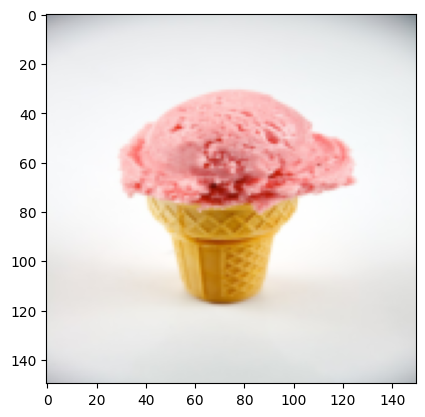

In [28]:
# Testing for a new image
flat_data = []
url = input ('Enter url of image to test: ')
img_array = imread(url)
# Resize image
img_resized = resize(img_array,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print("Dimensions of original image are:",img_array.shape)
plt.imshow(img_resized)
y_output = test_model.predict(flat_data)
y_output = Categories[y_output[0]]
# URLs to test:
#https://upload.wikimedia.org/wikipedia/commons/d/da/Strawberry_ice_cream_cone_%285076899310%29.jpg
#https://upload.wikimedia.org/wikipedia/commons/7/71/St._Bernard_puppy.jpg
print("PREDICTED OUTPUT IS:",y_output)